# **Chapter 3. Python 을 활용한 데이터 전처리** 





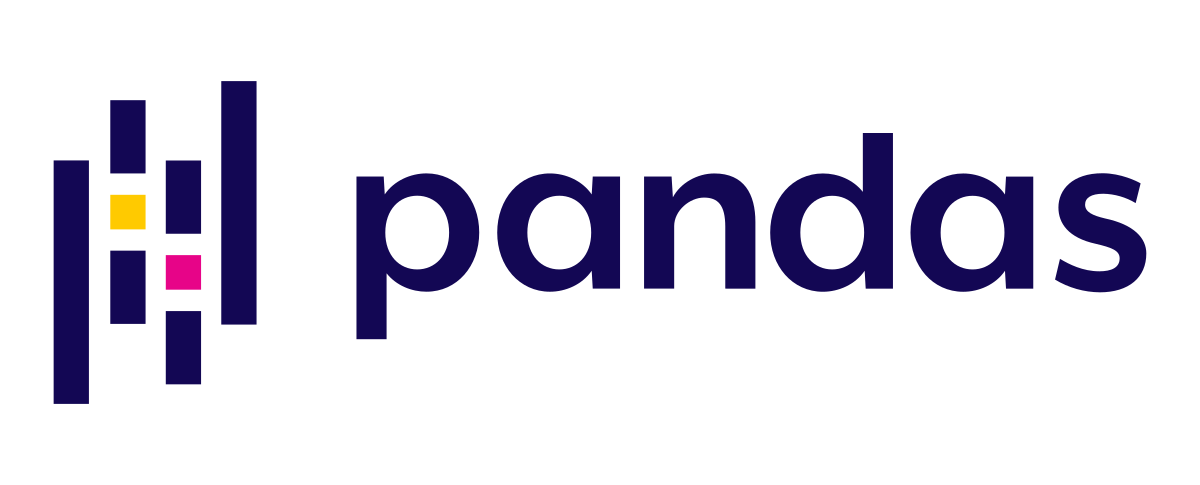


---
### **학습 목표**
> 3-4. Pandas 란? <br>
> 3-5. csv, excel 파일 읽고 쓰기, 요약 정보 한눈에 확인하기 <br>
> 3-6. 데이터 슬라이싱을 통해 Pandas 익숙해지기 <br>
> 3-7. 통계값 계산 및 정렬 방법 익히기 <br>
> 3-8. 피벗 테이블(pivot table) 기능과 그룹 통계(groupby) <br>
> 3-9. 데이터 합치기 (Join 과 Merge, Concat) <br>
> 3-10. 자료형 변환, 산술 연산 <br>
> 3-11. 전처리의 기본! 결측값, 중복 처리 <br>
> **3-12. 고급 기능 (apply, lambda, map) 으로 나도 이제 Pandas 고수!** <br>
> 3-13. Pandas 시각화로 멋지게 레포팅하자 <br>
> 3-14. 실습 예제 <br>

## 3-12. apply, lambda, map 함수

In [24]:
# 라이브러리 임포트
import pandas as pd
import numpy as np

In [25]:
# 실습 파일 로딩 (아이돌 프로필)
df = pd.read_csv('https://bit.ly/3gRXTfD')

In [26]:
# 상위 9개 정보 사용
df1 = df.loc[df['Gender']=='M'][:3]

In [27]:
df1

,Profile,Stage Name,Full Name,Korean Name,K. Stage Name,Date of Birth,Group,Country,Second Country,Height,Weight,Birthplace,Other Group,Former Group,Gender,Position,Instagram,Twitter
247,NaN,T.O.P,Choi Seunghyun,최승현,탑,1987-11-04,BIGBANG,South Korea,NaN,180,65,Seoul,GD&TOP,NaN,M,NaN,NaN,NaN
248,NaN,Taeyang,Dong Youngbae,동영배,태양,1988-05-18,BIGBANG,South Korea,NaN,174,56,Uljeongbu,NaN,NaN,M,NaN,NaN,NaN
249,NaN,G-Dragon,Kwon Jiyong,권지용,지드래곤,1988-08-18,BIGBANG,South Korea,NaN,177,58,Seoul,GD&TOP,NaN,M,NaN,NaN,NaN


In [28]:
df2 = df.head(9)

In [29]:
df2

,Profile,Stage Name,Full Name,Korean Name,K. Stage Name,Date of Birth,Group,Country,Second Country,Height,Weight,Birthplace,Other Group,Former Group,Gender,Position,Instagram,Twitter
0,Profile,Taeyeon,Kim Taeyeon,김태연,태연,1989-03-09,SNSD,South Korea,NaN,160,44,Jeonju,"TTS, Oh!GG",NaN,F,"Leader, Main Vocalist",taeyeon_ss,NaN
1,NaN,Sunny,Lee Sunkyu,이순규,써니,1989-05-15,SNSD,South Korea,NaN,158,43,California,NaN,NaN,F,NaN,svnnynight,NaN
2,NaN,Tiffany,Hwang Miyoung,황미영,티파니,1989-08-01,SNSD,South Korea,USA,163,50,San Francisco,TTS,NaN,F,NaN,xolovestephi,NaN
3,NaN,Hyoyeon,Kim Hyoyeon,김효연,효연,1989-09-22,SNSD,South Korea,NaN,158,48,Incheon,NaN,NaN,F,NaN,watasiwahyo,NaN
4,NaN,Yuri,Kwon Yuri,권유리,유리,1989-12-05,SNSD,South Korea,NaN,167,45,Goyang,NaN,NaN,F,NaN,yulyulk,NaN
5,NaN,Sooyoung,Choi Sooyoung,최수영,수영,1990-02-10,SNSD,South Korea,NaN,170,48,Gwangju,NaN,NaN,F,NaN,hotsootuff,NaN
6,NaN,Yoona,Im Yoona,임윤아,윤아,1990-05-30,SNSD,South Korea,NaN,166,47,Seoul,NaN,NaN,F,NaN,yoona__lim,NaN
7,NaN,Seohyun,Seo Joohyun,서주현,서현,1991-06-28,SNSD,South Korea,NaN,168,48,Seoul,TTS,NaN,F,NaN,seojuhyun_s,NaN
8,NaN,Jessica,Jessica Jung,제시카 정,제시카,1989-04-18,NaN,South Korea,NaN,0,0,NaN,NaN,SNSD,F,NaN,jessica.syj,NaN


In [30]:
df = pd.concat([df1, df2]).reset_index(drop=True)

In [31]:
df = df[['Height', 'Weight', 'Gender']]
df

,Height,Weight,Gender
0,180,65,M
1,174,56,M
2,177,58,M
3,160,44,F
4,158,43,F
5,163,50,F
6,158,48,F
7,167,45,F
8,170,48,F
9,166,47,F


> ###  **3-12-1. apply 함수**


> - apply 함수는 데이터에 **구체적인 로직을 적용** 하고 싶을 경우 사용합니다.
> - **로직이 정의된 함수를 만들고**, **`apply()` 함수에 대입**합니다.


In [32]:
def replace_zero(x):
    if x==0:
        x=165   # 값이 0일 경우 원하는 값으로 대체
    return x

In [33]:
df['Height']= df['Height'].apply(replace_zero)

In [34]:
df

,Height,Weight,Gender
0,180,65,M
1,174,56,M
2,177,58,M
3,160,44,F
4,158,43,F
5,163,50,F
6,158,48,F
7,167,45,F
8,170,48,F
9,166,47,F


> ###  **3-12-2. lambda 함수**


> - lambda 함수는 apply 에서 **`def` 정의된 함수와 동일한 기능**을 합니다.
> - 다만, **한줄로 간편하게 작성**할 수 있기 때문에 `def 함수명`, `return` 등 복잡하게 작성하지 않아도 됩니다.
> - 로직이 복잡하지 않을 경우 (사칙연산, 간단한 문자열 추출 등), 자주 사용하는 함수입니다.
> - 기본 사용법
    - **`lambda '입력변수': '리턴값' '조건문(옵션)'`**


In [38]:
# 값이 0일 경우 원하는 값으로 대체
df['Weight']= df['Weight'].apply(lambda x: 50 if x==0 else x)

In [39]:
df

,Height,Weight,Gender
0,180,65,M
1,174,56,M
2,177,58,M
3,160,44,F
4,158,43,F
5,163,50,F
6,158,48,F
7,167,45,F
8,170,48,F
9,166,47,F


In [41]:
# 집계된 컬럼 만들기
df['Weight/Height']= df.apply(lambda x: x['Weight']/x['Height'], axis=1)

In [42]:
df

,Height,Weight,Gender,Weight/Height
0,180,65,M,0.361111
1,174,56,M,0.321839
2,177,58,M,0.327684
3,160,44,F,0.275000
4,158,43,F,0.272152
5,163,50,F,0.306748
6,158,48,F,0.303797
7,167,45,F,0.269461
8,170,48,F,0.282353
9,166,47,F,0.283133


> ###  **3-12-3. map 함수**


> - 데이터 값을 **특정한 값으로 매핑(mapping) 하고 싶은 경우** 사용합니다. 
> - 반복문을 작성하면서 값을 치환하는 방법보다 효율적인 방법입니다.
> - **(주의!) 하나의 컬럼인, Series 형으로만 적용할 수 있습니다.**
> - 기본 사용법
    - **`df['컬럼명'].map('매핑 정보')`**


In [43]:
map_info = {'M' : '남자', 
            'F' : '여자'}

In [44]:
df['Gender'] = df['Gender'].map(map_info)

In [45]:
df

,Height,Weight,Gender,Weight/Height
0,180,65,남자,0.361111
1,174,56,남자,0.321839
2,177,58,남자,0.327684
3,160,44,여자,0.275000
4,158,43,여자,0.272152
5,163,50,여자,0.306748
6,158,48,여자,0.303797
7,167,45,여자,0.269461
8,170,48,여자,0.282353
9,166,47,여자,0.283133
